In [1]:
from ugropy import abdulelah_gani_t, abdulelah_gani, instantiate_mol_object

import pandas as pd

import numpy as np

from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
df = pd.read_csv("../abdulelah_gani_frags/gf.csv", index_col="SMILES", sep="|", comment="?")

primary = np.linspace(351, 424, 74, dtype=int).astype(str)

df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

df.dropna(inplace=True)

In [3]:
for idx, smiles in enumerate(df.index):
    try:
        solution = abdulelah_gani_t.get_groups(smiles, "smiles")
    except Exception as e:
        print(smiles, idx)
        raise e

    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles]
    if isinstance(row, pd.DataFrame):
        row = row.iloc[0]
    row = row[row != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()
    
    # Eliminar las llaves 372 y 373 para la comparación
    #row_dict.pop(372, None)
    #row_dict.pop(373, None)
    solution_dict = solution.subgroups_numbers.copy()
    #solution_dict.pop(372, None)
    #solution_dict.pop(373, None)

    # Verificar si ninguna solución tiene subgroups_numbers igual a row_dict
    if solution_dict != row_dict:
        print(smiles)
        print(idx)
        print("Subgrupos:")
        print(str(solution.subgroups))  # Convertir a string y unir con saltos de línea
        print("Subgrupos por número:")
        print(str(solution.subgroups_numbers))  # Convertir a string y unir con saltos de línea
        print("Gani: ")
        print(row_dict)
        
        gani_groups = {}
        for group, ocurr in row_dict.items():
            group_name = abdulelah_gani_t.subgroups_info.loc[abdulelah_gani_t.subgroups_info["group_number"] == group].index[0]
            gani_groups[group_name] = ocurr
            
        print("Gani group names:")
        print(gani_groups)
        
        wrong_smiles = smiles
        break

OCCN(CCO)CCO
172
Subgrupos:
{'OH-(CHp)k-NHx-(CHn)m-OH (m,k>0; p,n,x in 0..2)': 3}
Subgrupos por número:
{357: 3}
Gani: 
{}
Gani group names:
{}


In [4]:
mol = instantiate_mol_object(wrong_smiles, "smiles")

abdulelah_gani_t.detect_fragments(mol)

{'OH-(CHp)k-NHx-(CHn)m-OH (m,k>0; p,n,x in 0..2)_0': (3, 2, 1, 0, 4, 5, 6),
 'OH-(CHp)k-NHx-(CHn)m-OH (m,k>0; p,n,x in 0..2)_1': (3, 2, 1, 0, 7, 8, 9),
 'OH-(CHp)k-NHx-(CHn)m-OH (m,k>0; p,n,x in 0..2)_2': (3, 4, 5, 6, 7, 8, 9)}

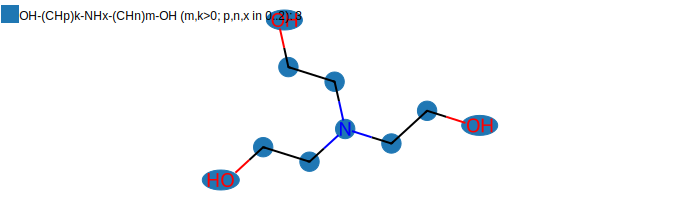

In [5]:
sol = abdulelah_gani_t.get_groups(wrong_smiles, "smiles")

sol.draw(width=700)

In [7]:
sm = abdulelah_gani.get_groups(wrong_smiles, "smiles")

sm.ig_formation_gibbs

<Quantity(-299.300287, 'kilojoule / mole')>